<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/M%C3%A9todo_de_Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Método de Colocación

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

Definimos las variables

In [34]:
x, a, b = sp.symbols("x, a, b")
u = sp.Function("u")

Escribimos la ecuacion

In [35]:
ecu = u(x).diff(x, 2) + u(x) - x
ecu

-x + u(x) + Derivative(u(x), (x, 2))

Resolvemos la ecuacion

In [6]:
sol = sp.dsolve(ecu, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})
sol

Eq(u(x), x + sin(x))

In [43]:
valorex = sp.lambdify(x, sp.simplify(sol.rhs), "numpy")

Graficamos

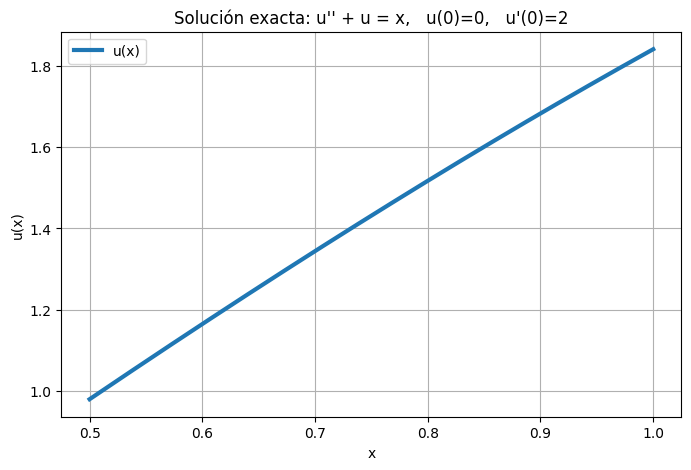

In [67]:
xx = np.linspace(0.5, 1, 200)
yy = valorex(xx)
plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="u(x)", linewidth=3)
plt.title("Solución exacta: u'' + u = x,   u(0)=0,   u'(0)=2")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Escribimos la ecuacion $u_N$

In [27]:
un = 2*x + a*x**2 + b*x**3
un

a*x**2 + b*x**3 + 2*x

Obtenemos la ecuacion $u_N''$

In [28]:
un2 = sp.diff(un, x, 2)
un2

2*(a + 3*b*x)

Definimos la ecuacion $e$ = $u_N''+u_N-x$

In [29]:
e = sp.simplify(un2 + un - x)
e

a*x**2 + 2*a + b*x**3 + 6*b*x + x

Asignamos las restricciones

In [13]:
points = [sp.Rational(1, 2), sp.Rational(1, 1)]
points

[1/2, 1]

Resolvemos

In [48]:
eqs = [sp.Eq(e.subs(x, p), 0) for p in points]
sol_ab = sp.solve(eqs, [a, b])
sol_ab

{a: -1/17, b: -2/17}

In [54]:
valores = sp.lambdify(x, un.subs(sol_ab) , "numpy")

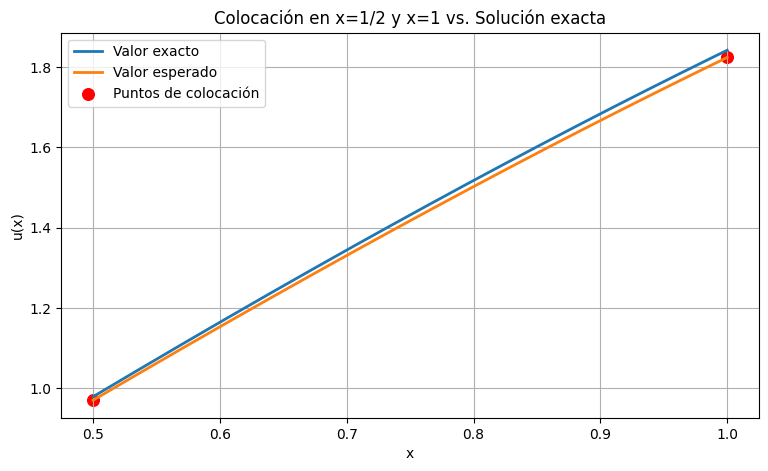

In [68]:
xx = np.linspace(0.5, 1, 200)
y2 = valores(xx)
plt.figure(figsize=(9,5))
plt.plot(xx, yy, label="Valor exacto", linewidth=2)
plt.plot(xx, y2, label="Valor esperado", linewidth=2)
plt.scatter([0.5, 1.0], valores(np.array([0.5, 1.0])), color="red", s=70, label="Puntos de colocación")
plt.title("Colocación en x=1/2 y x=1 vs. Solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

In [71]:
x_vals = np.linspace(0, 1, 10)
ves = valores(x_vals)
vex = valorex(x_vals)

error = vex - ves
errorabs = np.abs(error)

tabla = list(zip(x_vals, vex, ves, errorabs))
titulos = ["x", "Valor exacto", "Valor esperado", "Error abs"]

print(tabulate(tabla, headers=titulos, tablefmt="heavy_grid"))

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃        x ┃   Valor exacto ┃   Valor esperado ┃   Error abs ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃ 0        ┃       0        ┃         0        ┃ 0           ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃ 0.111111 ┃       0.221994 ┃         0.221335 ┃ 0.000659115 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃ 0.222222 ┃       0.44262  ┃         0.440249 ┃ 0.00237144  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃ 0.333333 ┃       0.660528 ┃         0.655773 ┃ 0.00475461  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃ 0.444444 ┃       0.874401 ┃         0.866941 ┃ 0.00745979  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃ 0.555556 ┃       1.08297  ┃         1.07278  ┃ 0.0101879   ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃ 0.666667 ┃       1.28504  ┃         1.27233  ┃ 0.0127

In [70]:
norma = np.max(errorabs)
print("Norma del error", norma)

Norma del error 0.01794157304319066
